In [25]:
import numpy as np
from sklearn import cluster, manifold, metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 5]
import pandas as pd

np.random.seed(0)

classes = ['dog_bark', 'footstep', 'gunshot', 'keyboard', 'moving_motor_vehicle', 'rain', 'sneeze_cough']
embeddings = ['vgg', 'clap', 'pann']

fads = []
for e in embeddings:
    fad = pd.read_excel('./data/'+e+'.xlsx')
    fads.append(np.nan_to_num(fad.iloc[:, 1:].to_numpy()))

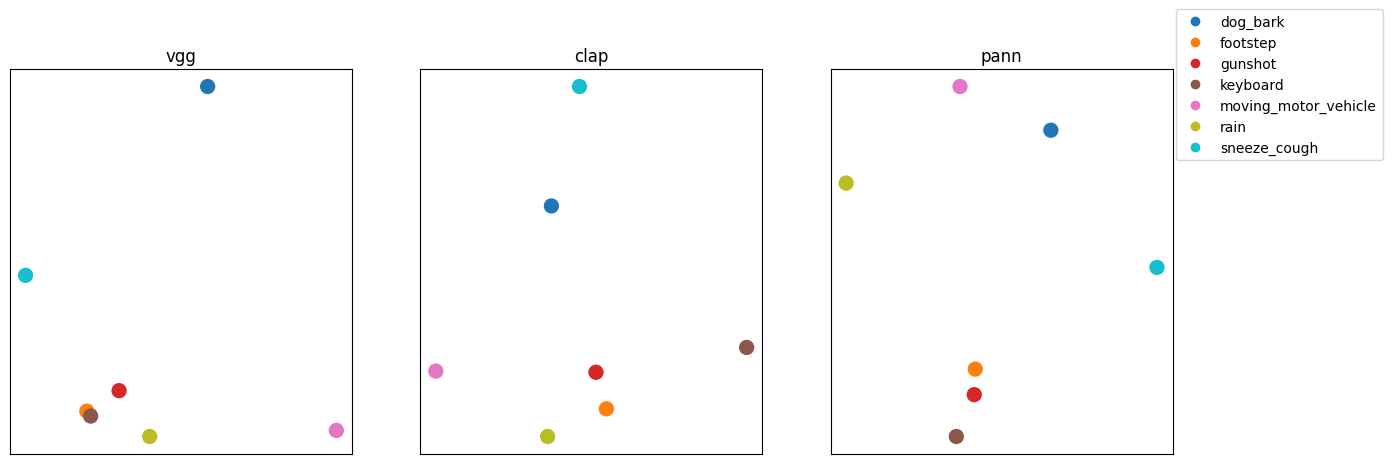

In [26]:

fig, axes = plt.subplots(ncols=len(embeddings))

for fad_index, fad in enumerate(fads):
    projection = manifold.Isomap(n_components=2).fit_transform(fad)
    sc = axes[fad_index].scatter(projection[:, 0], projection[:, 1], c=range(len(classes)), s=100, cmap='tab10')
    axes[fad_index].set_title(embeddings[fad_index])

    # Hide X and Y axes label marks
    axes[fad_index].xaxis.set_tick_params(labelbottom=False)
    axes[fad_index].yaxis.set_tick_params(labelleft=False)

    # Hide X and Y axes tick marks
    axes[fad_index].set_xticks([])
    axes[fad_index].set_yticks([])
fig.legend(handles=sc.legend_elements()[0], labels=classes, bbox_to_anchor=(1.04, 1), borderaxespad=0)
plt.show()